In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [39]:
len(train_data[0])

87

In [4]:
len(test_data)

2246

In [5]:
import numpy as np
np.array(train_data[0])

array([   1,    2,    2,    8,   43,   10,  447,    5,   25,  207,  270,
          5, 3095,  111,   16,  369,  186,   90,   67,    7,   89,    5,
         19,  102,    6,   19,  124,   15,   90,   67,   84,   22,  482,
         26,    7,   48,    4,   49,    8,  864,   39,  209,  154,    6,
        151,    6,   83,   11,   15,   22,  155,   11,   15,    7,   48,
          9, 4579, 1005,  504,    6,  258,    6,  272,   11,   15,   22,
        134,   44,   11,   15,   16,    8,  197, 1245,   90,   67,   52,
         29,  209,   30,   32,  132,    6,  109,   15,   17,   12])

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [37]:
x_train[0].shape

(10000,)

In [13]:
def one_hot(labels, dimension=46):
    results=np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i,label]=1.
    return results

In [15]:
y_train = one_hot(train_labels)
y_test = one_hot(test_labels)

In [16]:
from keras import models
from keras import layers

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [23]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [25]:
history = model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 2s 305us/step - loss: 2.4997 - acc: 0.4899 - val_loss: 1.6813 - val_acc: 0.6480
Epoch 2/10
7982/7982 [==============================] - 1s 153us/step - loss: 1.3915 - acc: 0.7038 - val_loss: 1.2790 - val_acc: 0.7190
Epoch 3/10
7982/7982 [==============================] - 1s 154us/step - loss: 1.0487 - acc: 0.7699 - val_loss: 1.1181 - val_acc: 0.7610
Epoch 4/10
7982/7982 [==============================] - 1s 160us/step - loss: 0.8246 - acc: 0.8282 - val_loss: 1.0217 - val_acc: 0.7760
Epoch 5/10
7982/7982 [==============================] - 1s 158us/step - loss: 0.6599 - acc: 0.8637 - val_loss: 0.9688 - val_acc: 0.7970
Epoch 6/10
7982/7982 [==============================] - 1s 173us/step - loss: 0.5254 - acc: 0.8931 - val_loss: 0.9200 - val_acc: 0.8090
Epoch 7/10
7982/7982 [==============================] - 2s 189us/step - loss: 0.4291 - acc: 0.9118 - val_loss: 0.9110 - val_acc: 0.8040


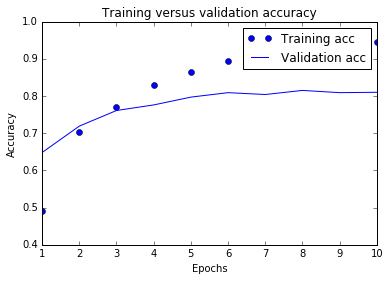

In [27]:
import matplotlib.pyplot as plt
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, 11)

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training versus validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
results = model.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 164us/step


In [29]:
results

[1.0014360084771472, 0.78628673196794296]

In [30]:
predictions = model.predict(x_test)

In [31]:
predictions[0]

array([  9.72478119e-07,   1.15421062e-05,   8.76789670e-07,
         9.87298250e-01,   9.72961634e-03,   2.61241826e-06,
         6.31161538e-06,   1.94322311e-05,   5.89461706e-04,
         5.17864964e-06,   2.58626715e-05,   2.51167483e-04,
         1.91832373e-06,   4.56025700e-05,   4.14684291e-05,
         1.21536303e-07,   4.87882557e-04,   2.02904776e-05,
         7.45984471e-06,   1.08460583e-04,   7.20564509e-04,
         3.95238567e-05,   3.66956942e-06,   3.55051598e-05,
         1.37407687e-06,   4.86200861e-07,   1.47997497e-07,
         1.41762314e-06,   2.20259226e-05,   6.57164492e-05,
         6.91581226e-05,   2.38592129e-05,   1.00611378e-05,
         3.55585803e-06,   9.90339777e-06,   7.37225264e-06,
         1.38232253e-05,   6.25135772e-06,   2.28546014e-06,
         2.86383613e-04,   5.81064705e-06,   6.93489619e-06,
         2.72860916e-07,   4.48203855e-06,   4.74938224e-06,
         9.65079181e-08], dtype=float32)

In [32]:
predictions[0].shape

(46,)

In [33]:
np.sum(predictions[0])

1.0

In [40]:
np.argmax(predictions[0])

3